### Index No - 190621M
### Name - K. Thanushan 

### EN2550 Assignment 01
### Intensity Transformations and Neighborhood Filtering

### Question 1. Performing a given intensity transformation for a given image

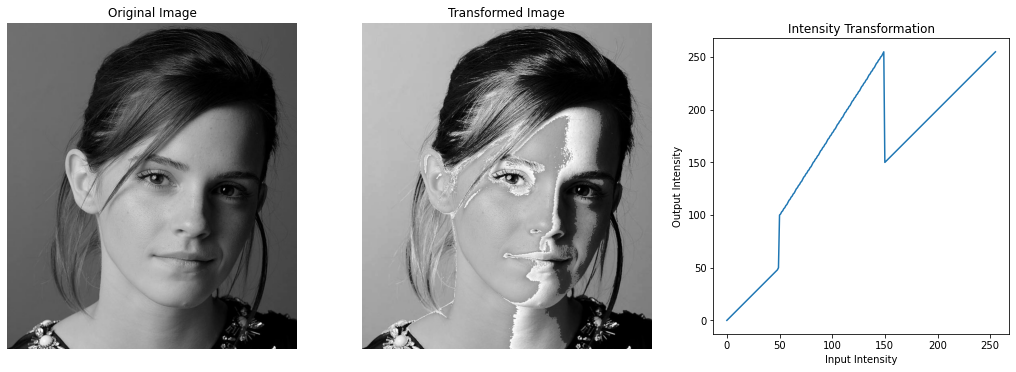

In [4]:
#Question 1
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

#Reading the image and plotting its original version
Original_image = cv.imread(r'emma_gray.jpg')
assert Original_image is not None

#Performing the given intensity transformation and plotting the transformed image
t1 = np.linspace(0, 50, 50)
t2 = np.linspace(100, 255, 100)
t3 = np.linspace(150, 255, 106)
t = np.concatenate((t1, t2, t3), axis = 0).astype(np.uint8)

#Getting the transformed image
assert len(t) == 256
Transformed_image = cv.LUT(Original_image, t)
assert Transformed_image is not None

#Plotting the Images and the intensity transformation
Image = cv.cvtColor(Original_image, cv.COLOR_BGR2RGB)
Img = cv.cvtColor(Transformed_image, cv.COLOR_BGR2RGB)
fig, ax = plt.subplots(1, 3, figsize = (18,6))
ax[0].imshow(Image)
ax[0].set_title('Original Image')
ax[0].axis('off')
ax[1].imshow(Img)
ax[1].set_title('Transformed Image')
ax[1].axis('off')
ax[2].plot(t)
ax[2].set_title('Intensity Transformation')
ax[2].set_xlabel('Input Intensity')
ax[2].set_ylabel('Output Intensity')
ax[2].set_aspect('equal')
plt.show()


### Question 2. Performing Intensity Transformations to accentuate white matter and gray matter 

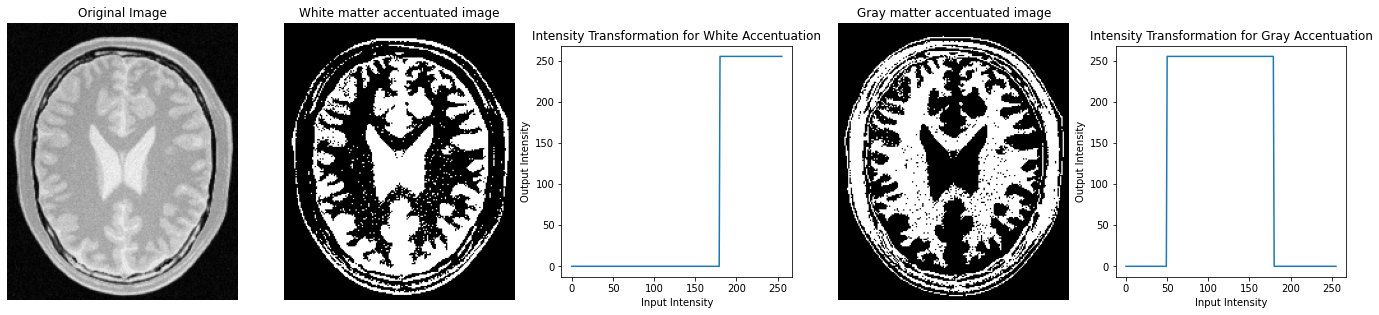

In [13]:
#Question 2
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

#Reading the given image
Original_image = cv.imread(r'brain_proton_density_slice.png')
assert Original_image is not None

#Transforming the image
#White accentuation
t1 = np.linspace(0, 0, 180)
t2 = np.linspace(255, 255, 76)
transform_1 = np.concatenate((t1, t2), axis = 0).astype(np.uint8)
Transformed_image_white = cv.LUT(Original_image,transform_1)

#Gray accentuation
t1 = np.linspace(0, 0, 50)
t2 = np.linspace(255, 255, 130)
t3 = np.linspace(0, 0, 76)
transform_2 = np.concatenate((t1, t2, t3), axis = 0).astype(np.uint8)
Transformed_image_gray = cv.LUT(Original_image,transform_2)

#Plotting the Images
Image_plot = cv.cvtColor(Original_image, cv.COLOR_BGR2RGB)
fig, ax = plt.subplots(1, 5, figsize = (24,6))
ax[0].imshow(Image_plot)
ax[0].set_title('Original Image')
ax[0].axis('off')
ax[1].imshow(Transformed_image_white)
ax[1].set_title("White matter accentuated image")
ax[1].axis('off')
ax[2].plot(transform_1)
ax[2].set_title('Intensity Transformation for White Accentuation')
ax[2].set_xlabel('Input Intensity')
ax[2].set_ylabel('Output Intensity')
ax[2].set_aspect('equal')
ax[3].imshow(Transformed_image_gray)
ax[3].set_title("Gray matter accentuated image")
ax[3].axis('off')
ax[4].plot(transform_2)
ax[4].set_title('Intensity Transformation for Gray Accentuation')
ax[4].set_xlabel('Input Intensity')
ax[4].set_ylabel('Output Intensity')
ax[4].set_aspect('equal')
plt.show()

### Question 3. Gamma Correction($\gamma = 0.5$) and Histograms 

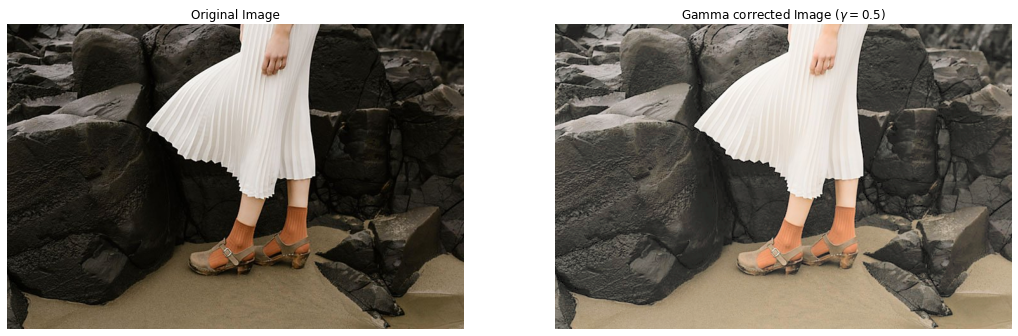

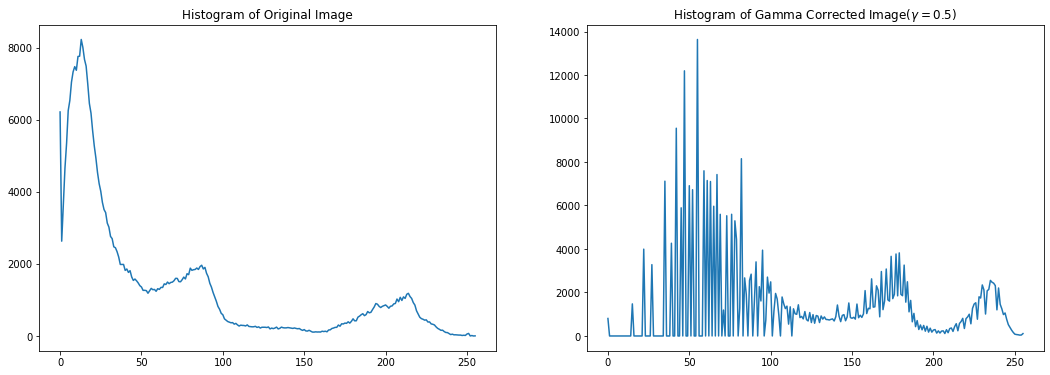

In [2]:
#Question 3
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

#Reading the given image
Original_image = cv.imread(r'highlights_and_shadows.jpg')
assert Original_image is not None

#Performing gamma correction
Gamma = 0.5
Lab = cv.cvtColor(Original_image, cv.COLOR_BGR2Lab)
t = np.array([(p/255)**Gamma*255 for p in range(0,256)]).astype(np.uint8)
g = cv.LUT(Lab[:,:,0],t)
New_image = Lab
New_image[:,:,0] = g
assert New_image is not None

#Plotting the Images
Image_plot = cv.cvtColor(Original_image, cv.COLOR_BGR2RGB)
fig, ax = plt.subplots(1, 2, figsize = (18,6))
ax[0].imshow(Image_plot)
ax[0].set_title('Original Image')
ax[0].axis('off')

Image_plot2= cv.cvtColor(New_image, cv.COLOR_Lab2RGB)
ax[1].imshow(Image_plot2)
ax[1].set_title("Gamma corrected Image ($\gamma = 0.5$)")
ax[1].axis('off')
plt.show()

#Calculating the histograms of the images
Original_image_histogram = cv.calcHist([Original_image], [0], None, [256], [0,256])
Changed_image_histogram = cv.calcHist([New_image], [0], None, [256], [0,256])

#Plotting the histograms
fig, ax = plt.subplots(1, 2, figsize = (18,6))
ax[0].plot(Original_image_histogram)
ax[0].set_title('Histogram of Original Image')
ax[1].plot(Changed_image_histogram)
ax[1].set_title('Histogram of Gamma Corrected Image($\gamma = 0.5$)')
plt.show()


### Question 4. Calculating and Equalizing the histogram of a given image

Text(0.5, 1.0, 'Histogram of Equalized Image')

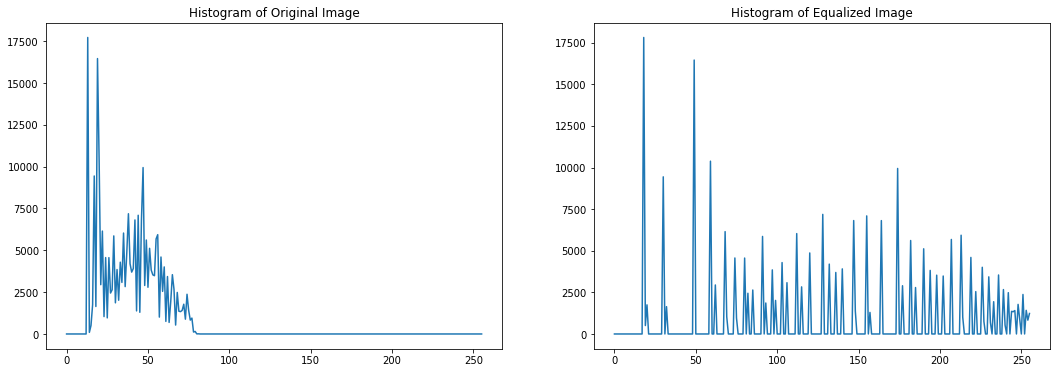

In [40]:
#Question 4
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

#Equalization function
def Equalize(Original_image, Original_image_histogram, S):
    N = len(Original_image_histogram)
    Image = np.zeros((S[0], S[1]))
    Equalize_List = []
    for i in range(N):
        Sumlist = Original_image_histogram[:i+1]
        Value = ((N-1)/(S[0]*S[1]))*(sum(Sumlist))
        Equalize_List.append(Value)
    Equalize_List = np.round(Equalize_List)
    for i in range(S[0]):
        for j in range(S[1]):
            Value = Original_image[i,j]
            Original_image[i,j] = Equalize_List[Value]
    return Original_image

#Reading the image
Initial_image = cv.imread(r'shells.png', cv.IMREAD_GRAYSCALE)
assert Initial_image is not None

#Calculating the histograms of the initial image and the equalized image
Original_image_histogram = cv.calcHist([Initial_image], [0], None, [256], [0,256])
Equalized_image = cv.equalizeHist(Initial_image)
S = np.shape(Initial_image)
Equalized_image = Equalize(Initial_image, Original_image_histogram, S)
Equalized_image_histogram = cv.calcHist([Equalized_image], [0], None, [256], [0,256])


#Plotting the histograms
fig, ax = plt.subplots(1, 2, figsize = (18,6))
ax[0].plot(Original_image_histogram)
ax[0].set_title('Histogram of Original Image')
ax[1].plot(Equalized_image_histogram)
ax[1].set_title('Histogram of Equalized Image')


### Question 5. Zooming a given image

In [91]:
#Question 5
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

#Zoom functon
def NearestNeighborZoom(Image, scale):
    shape = np.shape(Image)
    Rows = int(shape[0]*scale)
    Columns = int(shape[1]*scale)
    Zoomed_image = np.zeros((Rows, Columns, shape[2]), dtype = np.uint8)
    for i in range(0, Rows):
        for j in range(0, Columns):
            X = min(shape[0]-1, round(i/scale))
            Y = min(shape[1]-1, round(j/scale))
            Zoomed_image[i, j] = Image[int(X), int(Y)]
    return Zoomed_image

def BilinearZoom(Image, scale):
    shape = np.shape(Image)
    Rows = int(shape[0]*scale)
    Columns = int(shape[1]*scale)
    Zoomed_image = np.zeros((Rows, Columns, shape[2]), dtype = Image.dtype)
    for m in range(0, Rows):
       for n in range(0, Columns):
            h = m/scale
            w = n/scale
            h_prev = int(max(0, np.floor(h)))
            w_prev = int(max(0, np.floor(w)))
            h_next = int(min(shape[0]-1, np.ceil(h)))
            w_next = int(min(shape[1]-1, np.ceil(w)))
            if (h_next==h_prev) and (w_next==w_prev):
                Pixel = Image[int(h), int(w), :]
            elif(h_next == h_prev):
                Immediate1 = Image[int(h), int(w_prev), :]
                Immediate2 = Image[int(h), int(w_next), :]
                Pixel = Immediate1*(w_next - w) + Immediate2 * (w - w_prev)
            elif (w_next == w_prev):
                Immediate1 = Image[int(h_prev), int(w), :]
                Immediate2 = Image[int(h_next), int(w), :]
                Pixel = Immediate1*(h_next - h) + Immediate2*(h - h_prev)
            else:
                pixel1 = Image[h_prev, w_prev, :]
                pixel2 = Image[h_next, w_prev, :]
                pixel3 = Image[h_prev, w_next, :]
                pixel4 = Image[h_next, w_next, :]
                Immediate1 = pixel1*(h_next - h) + pixel2*(h - h_prev)
                Immediate2 = pixel3*(h_next - h) + pixel4*(h - h_prev)
                Pixel = Immediate1*(w_next - w) + Immediate2*(w - w_prev)
            Zoomed_image[m, n, :] = Pixel
    return Zoomed_image

def SSD(Image, Zoomed_image, shape):
    L = shape[0]*shape[1]*shape[2]
    SSD = round(np.sum((Image - Zoomed_image)**2)/L, 4)
    return SSD

#Reading the given image
Original_image = cv.imread(r'im03small.png')
assert Original_image is not None
shape = np.shape(Original_image)
print(shape)
#Zooming the images
Zoomed_image1 = NearestNeighborZoom(Original_image, 4)
Zoomed_image2 = BilinearZoom(Original_image, 4)
#Plotting the Images
#cv.imwrite('Image.jpg', Zoomed_image2)
Checking_image = cv.imread(r'im03.png')
Checking_image = cv.resize(checking_image, (1460, 2400, 3))
Nearest_SSD = SSD(Checking_image, Zoomed_image1, shape)
Bilinear_SSD = SSD(Checking_image, Zoomed_image2, shape)
print('SSD value in nearest neighbourhood zooming = ', Nearest_SSD)
print('SSD value in bilinear interpolation zooming = ', Bilinear_SSD)



(300, 480, 3)
SSD value in nearest neighbourhood zooming =  268.6875
SSD value in bilinear interpolation zooming =  259.3884


### Question 6. Sobel filtering with filter 2D

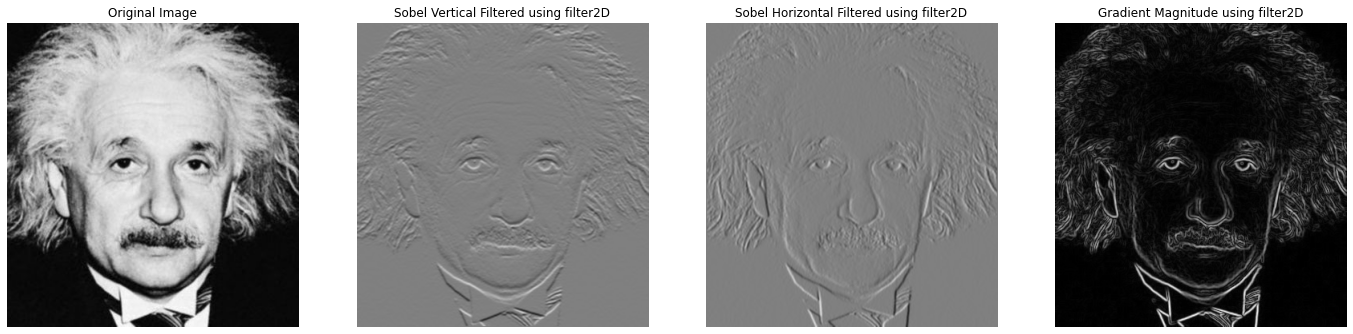

In [64]:
#Question 6a
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

#Reading the given image
Original_image = cv.imread(r'einstein.png',cv.IMREAD_GRAYSCALE).astype(np.float32)
assert Original_image is not None

#Sobel filtering using filter 2D function
sobel_v = np.array([[-1,-2,-1], [0,0,0], [1,2,1]], dtype = np.float32)
Sobel_vertical_image = cv.filter2D(Original_image,-1, sobel_v)
sobel_h = np.array([[-1,0,1], [-2,0,2], [-1,0,1]], dtype = np.float32)
Sobel_horizontal_image = cv.filter2D(Original_image, -1, sobel_h)
grad_mag1 = np.sqrt(Sobel_vertical_image**2 + Sobel_horizontal_image**2)


#Plotting the Images
fig, ax = plt.subplots(1, 4, figsize = (24,6))
ax[0].imshow(Original_image, cmap='gray', vmin=0, vmax = 255)
ax[0].set_title('Original Image')
ax[0].axis('off')
ax[1].imshow(Sobel_vertical_image, cmap='gray', vmin=-1020, vmax = 1020)
ax[1].set_title("Sobel Vertical Filtered using filter2D")
ax[1].axis('off')
ax[2].imshow(Sobel_horizontal_image, cmap='gray', vmin=-1020, vmax = 1020)
ax[2].set_title("Sobel Horizontal Filtered using filter2D")
ax[2].axis('off')
ax[3].imshow(grad_mag1, cmap='gray')
ax[3].set_title("Gradient Magnitude using filter2D")
ax[3].axis('off')
plt.show()

### Question 6. Manual Sobel Filtering

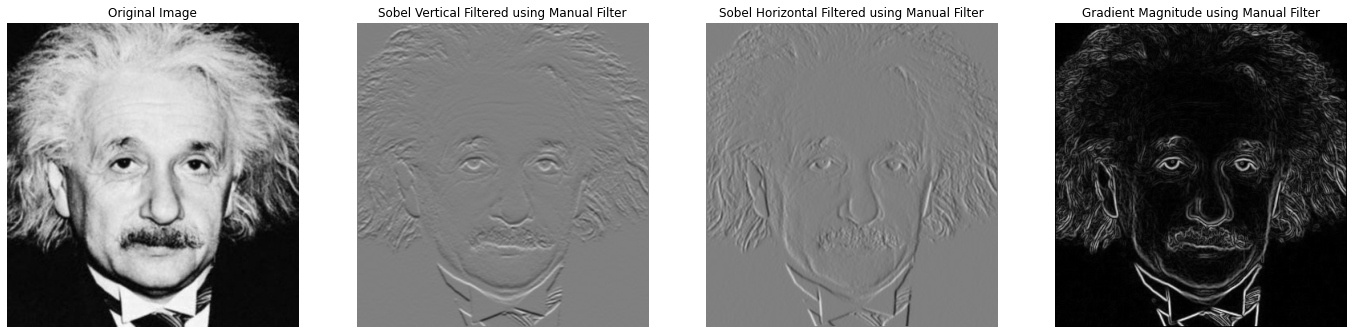

In [65]:
#Question 6a
%matplotlib inline
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

#Manual Sobel Filtering
def ManualFilter(Image, Kernel):
    #assert Kernel.shape[0]%2 == 1 and Kernel.shape[1] % 2 == 1
    k_hh, k_hw = int(np.floor(Kernel.shape[0]/2)), int(np.floor(Kernel.shape[1]/2))
    h, w = Image.shape
    Image_changedtype = Image.astype('float')
    filtered_image = np.zeros(Image.shape, 'float')
    for i in range(k_hh, h - k_hh):
        for j in range(k_hw , w - k_hw):
            filtered_image[i, j] = np.dot(Image_changedtype[i - k_hh : i + k_hh + 1 , j - k_hw : j + k_hw + 1].flatten(), Kernel.flatten())
    return filtered_image

#Reading the given image
Original_image = cv.imread(r'einstein.png',cv.IMREAD_GRAYSCALE)
assert Original_image is not None

sobel_v = np.array([[-1,-2,-1], [0,0,0], [1,2,1]], dtype = np.float32)
Image_v = ManualFilter(Original_image, sobel_v)
sobel_h = np.array([[-1,0,1], [-2,0,2], [-1,0,1]], dtype = np.float32)
Image_h = ManualFilter(Original_image, sobel_h)
grad_mag2 = np.sqrt(Image_v**2 + Image_h**2)

#Plotting the Images
fig, ax = plt.subplots(1, 4, figsize = (24,6))
ax[0].imshow(Original_image, cmap='gray', vmin=0, vmax = 255)
ax[0].set_title('Original Image')
ax[0].axis('off')
ax[1].imshow(Image_v, cmap='gray', vmin=-1020, vmax = 1020)
ax[1].set_title("Sobel Vertical Filtered using Manual Filter")
ax[1].axis('off')
ax[2].imshow(Image_h, cmap='gray', vmin=-1020, vmax = 1020)
ax[2].set_title("Sobel Horizontal Filtered using Manual Filter")
ax[2].axis('off')
ax[3].imshow(grad_mag2, cmap='gray')
ax[3].set_title("Gradient Magnitude using Manual Filter")
ax[3].axis('off')
plt.show()

### Question 7. Enhancing a given image

(-0.5, 560.5, 840.5, -0.5)

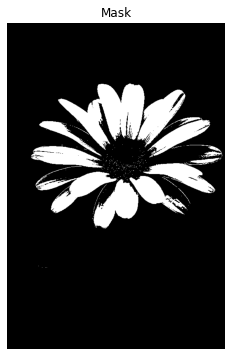

In [19]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

#Reading the given image
Original_image = cv.imread(r'daisy.jpg', cv.IMREAD_GRAYSCALE)
assert Original_image is not None

ret, Mask = cv.threshold(Original_image, 200, 255, cv.THRESH_BINARY)
cv.imwrite('Mask.jpg', Mask)
fig, ax = plt.subplots(1, 1, figsize = (18,6))
ax.imshow(Mask, cmap = 'gray', vmin=0, vmax = 255)
ax.set_title('Mask')
ax.axis('off')

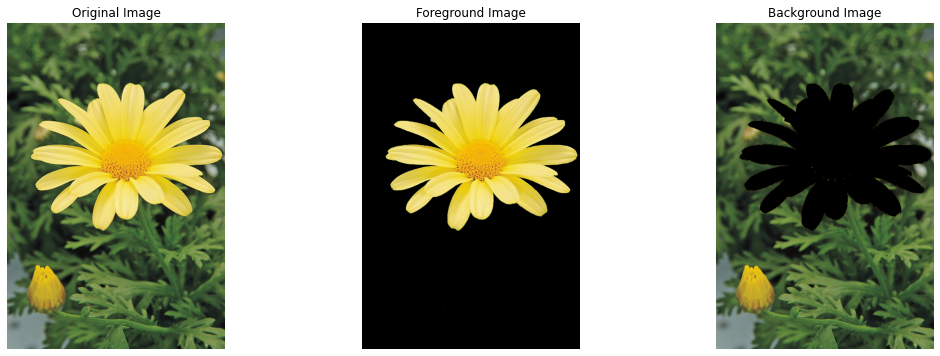

In [42]:
#Question 7
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

#Reading the given image
Original_image = cv.imread(r'daisy.jpg')
assert Original_image is not None
Mask_image = cv.imread(r'Mask.jpg',cv.IMREAD_GRAYSCALE)
assert Mask_image is not None

#Separating the foreground and the background
Mask = np.zeros((Original_image.shape[:2]), dtype = np.uint8)

#Generating a mask that generates the foreground and background
Mask[Mask_image == 0] = cv.GC_PR_BGD
Mask[Mask_image > 0] = cv.GC_PR_FGD

fgdModel = np.zeros((1, 65), np.float64)
bgdModel = np.zeros((1, 65), np.float64)

mask, bgdModel, fgdModel = cv.grabCut(Original_image,Mask,None,bgdModel,fgdModel,5,cv.GC_INIT_WITH_MASK)

mask = np.where((mask==2)|(mask==0),0,1).astype('uint8')
Foreground_image = Original_image*mask[:,:,np.newaxis]
Background_image = Original_image - Foreground_image
#Plotting the Images
Image_plot = cv.cvtColor(Original_image, cv.COLOR_BGR2RGB)
fig, ax = plt.subplots(1, 3, figsize = (18,6))
ax[0].imshow(Image_plot)
ax[0].set_title('Original Image')
ax[0].axis('off')

Image_plot2= cv.cvtColor(Foreground_image, cv.COLOR_BGR2RGB)
ax[1].imshow(Image_plot2)
ax[1].set_title("Foreground Image")
ax[1].axis('off')
Image_plot3= cv.cvtColor(Background_image, cv.COLOR_BGR2RGB)
ax[2].imshow(Image_plot3)
ax[2].set_title("Background Image")
ax[2].axis('off')
plt.show()

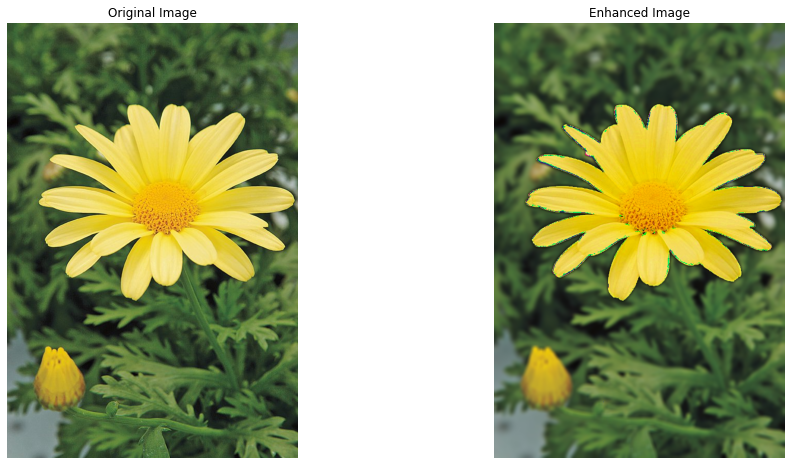

In [43]:
#Question 7b
#Enhancing foreground
HSV_image = cv.cvtColor(Foreground_image, cv.COLOR_BGR2HSV)
HSV_image[:, :, 1] = cv.add(HSV_image[:, :, 1],45)
HSV_image[:, :, 1] = np.clip(HSV_image[:, :, 1],0,255)
Enhanced_foreground = cv.cvtColor(HSV_image, cv.COLOR_HSV2BGR)
Kernel_size = 9
sigma = 4
Blurred_background = cv.GaussianBlur(Background_image, (Kernel_size, Kernel_size), sigma)
Enhanced_image = Enhanced_foreground + Blurred_background
Imageplot1 = cv.cvtColor(Original_image, cv.COLOR_BGR2RGB)
Imageplot2 = cv.cvtColor(Enhanced_image, cv.COLOR_BGR2RGB)
fig, ax = plt.subplots(1,2, figsize=(16,8))
ax[0].imshow(Imageplot1)
ax[0].set_title('Original Image')
ax[0].axis('off')
ax[1].imshow(Imageplot2)
ax[1].set_title('Enhanced Image')
ax[1].axis('off')
plt.show()

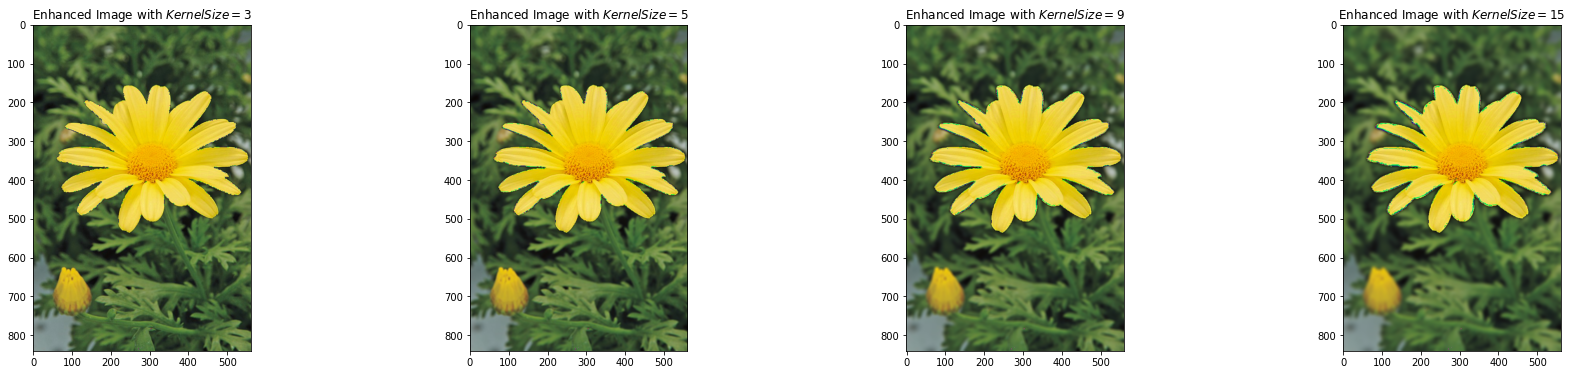

In [71]:
Kernels = [3,5,9,15]
fig, ax = plt.subplots(1,4, figsize = (30,6))
for i in range(0,len(Kernels)):
    Size = Kernels[i]
    Blurred_background = cv.GaussianBlur(Background_image, (Size, Size), sigma)
    Enhanced_image = Enhanced_foreground + Blurred_background
    Imageplot2 = cv.cvtColor(Enhanced_image, cv.COLOR_BGR2RGB)
    ax[i].imshow(Imageplot2)
    ax[i].set_title('Enhanced Image with $Kernel Size = {}$'.format(Size))
plt.show()


When the kernel size increases, the edges of the foreground image region which is black in the background image gains a significant value after gaussian blur so that when the foreground image is added to the background image, the edges of the foreground image do not gain the expected pixel value. Therfore the edges are quite dark.